In [5]:
from huggingface_hub import notebook_login
notebook_login()

In [1]:
import requests
from PIL import Image
import torch
import matplotlib.pyplot as plt
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from IPython.display import display_markdown

In [2]:
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

CUDA available: True
Device name: NVIDIA GeForce RTX 4080 SUPER


In [3]:
model_id = "google/paligemma-3b-mix-224"
device = "cuda:0"
dtype = torch.bfloat16
model = PaliGemmaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=dtype,
    device_map=device,
    low_cpu_mem_usage=True,  # Set this to True
    revision="bfloat16",
).eval()
processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

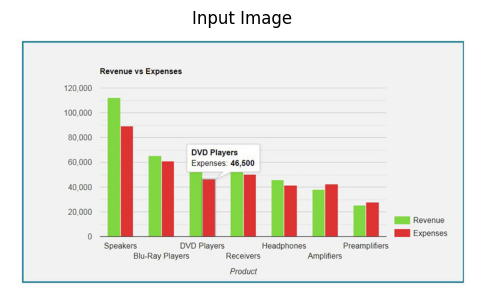

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


the graph shows that the revenue and expenses of the company are increasing, with the revenue outperforming the expenses.


In [23]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import requests
import torch

url = "https://wpdatatables.com/wp-content/uploads/2020/08/chart1.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Instruct the model to create a caption in Spanish
prompt = "Summarize the key trends and data insgights in the visual, make sure to include any notable patterns"
model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(model.device)
input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=500, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)


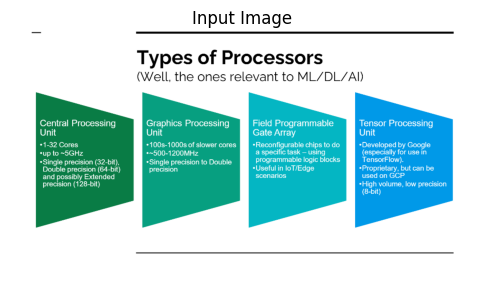

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


Sorry, as a base VLM I am not trained to answer this question.

In [12]:
from PIL import Image
import torch
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

# File path for the local image
file_path = r"C:/Users/rbrul/Documents/GitHub/wip_test/Paligemma/ExampleSlide.png"

# Load the image
image = Image.open(file_path).convert("RGB")

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Input Image")
plt.show()


# Instruct the model to create a caption in English
prompt = "Generate a detailed caption describing the content of the image in English."
model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(model.device)
input_len = model_inputs["input_ids"].shape[-1]

# Generate a caption
with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=200, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    display_markdown(decoded, raw=True)
